# Other Considerations

## Choosing a plot for discrete data
f you want to plot a discrete quantitative variable, it is possible to select either a histogram or a bar chart to depict the data. The histogram is the most immediate choice since the data is numeric, but there's one particular consideration to make regarding the bin edges. Since data points fall on set values (bar-width), it can help to reduce ambiguity by putting bin edges between the actual values taken by the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

die_rolls = pd.read_csv('die-rolls.csv')

# A fair dice has six-faces having numbers [1-6]. 
# There are 100 dices, and two trials were conducted.
# In each trial, all 100 dices were rolled down, and the outcome [1-6] was recorded.
# The `Sum` column represents the sum of the outcomes in the two trials, for each given dice. 
die_rolls.head(10)

,Dice,Trial 1,Trial 2,Sum
0,1,4,1,5
1,2,4,5,9
2,3,2,6,8
3,4,6,3,9
4,5,3,6,9
5,6,6,6,12
6,7,3,3,6
7,8,3,2,5
8,9,2,6,8
9,10,6,6,12


#### Example: Shifting the edges of the bars can remove ambiguity in the case of Discrete data.

bin edges for the left diagram: [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
bin edges for the right diagram: [ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]


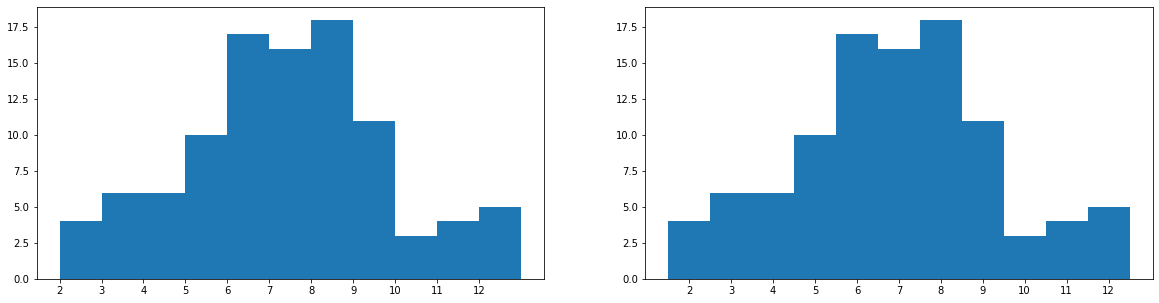

In [8]:
plt.figure(figsize = [20, 5])

# Histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`
print('bin edges for the left diagram:', bin_edges)
plt.hist(data=die_rolls, x='Sum', bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));


# Histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
print('bin edges for the right diagram:', bin_edges)
plt.hist(data=die_rolls, x='Sum', bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

> The same data is plotted in both subplots, but the alignment of the bin edges is different.

You'll notice for the left histogram, I've added 1.1 to the max value (12) for setting the bin edges, rather than just the desired bin width of 1. 

Recall that data that is equal to the rightmost bin edge gets lumped in to the last bin. This presents a potential problem in perception when a lot of data points take the maximum value, and so is especially relevant when the data takes on discrete values. 

The 1.1 adds an additional bin to the end to store the die rolls of value 12 alone, to avoid having the last bar catch both 11 and 12.

#### Example: Making gaps between individual bars
With "rwidth" set to 0.7, the bars will take up 70% of the space allocated by each bin, with 30% of the space left empty. This changes the default display of the histogram (which you could think of as "rwidth = 1") into a bar chart.

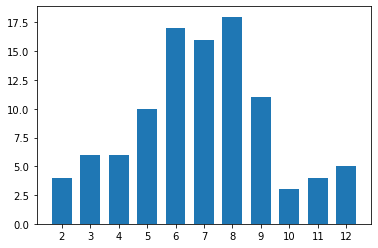

In [9]:
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=die_rolls, x='Sum', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1));

> Gaps between bars makes it clear that the data is discrete in nature

By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception. For continuous numeric data, you should not make use of the "rwidth" parameter, since the gaps imply discreteness of value.

As another caution, it might be tempting to use seaborn's countplot function to plot the distribution of a discrete numeric variable as bars. Be careful about doing this, since each unique numeric value will get a bar, regardless of the spacing in values between bars. (For example, if the unique values were {1, 2, 4, 5}, missing 3, countplot would only plot four bars, with the bars for 2 and 4 right next to one another.)

While you might justify plotting discrete numeric data using a bar chart, you’ll be less apt to justify the opposite: plotting ordinal data as a histogram. The space between bars in a bar chart helps to remind the reader that values are not contiguous in an ‘interval’-type fashion: only that there is an order in levels. With that space removed as in a histogram, it's harder to remember this important bit of interpretation.

## Descriptive Statistics, Outliers and Axis Limits

#### Example 1. Plot the histogram from the data having a skewed distribution of values

In [12]:
# load the dataset
pokemon = pd.read_csv('pokemon.csv')
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


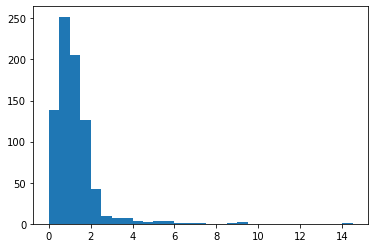

In [13]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)

# Plot the histogram for the height column
plt.hist(data=pokemon, x='height', bins=bins);

#### Example 2. Plot the histogram with a changed axis limit.

The function `xlim()` takes a tuple of two numbers specifying the upper and lower bounds of the x-axis range. Alternatively, the xlim function can be called with two numeric arguments only, `plt.xlim(0,6)`, to get the same result.

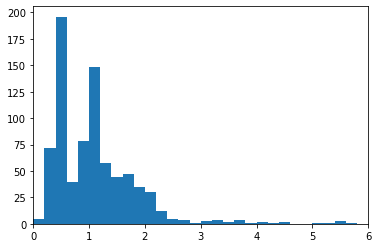

In [14]:
# Get the ticks for bins between [0-15], at an interval of 0.2
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins);

# Set the upper and lower bounds of the bins that are displayed in the plot
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,6));

In the generic example above, we might be interested in comparing patterns in other variables between data points that take values less than 6 to those that take values greater than 6. 

For anything that is concentrated on the bulk of the data in the former group (< 6), the use of axis limits can allow focusing on data points in that range without needing to go through the creation of new DataFrame filtering out the data points in the latter group (> 6).

#### Example: Plot the above two graphs in a single figure of size 20 x 5 inches, side-by-side.

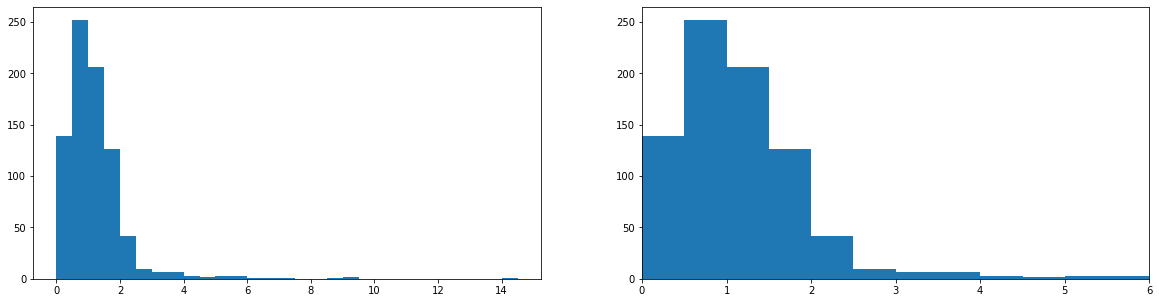

In [20]:
# Define the figure size
plt.figure(figsize=[20, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon.height.max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins=bin_edges)

# histogram on right: focus in on bulk of data < 6
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, pokemon.height.max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins=bin_edges)
plt.xlim(0, 6);

## Scales and Transformations

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution.

#### Example 1: Scale the x-axis to log-type

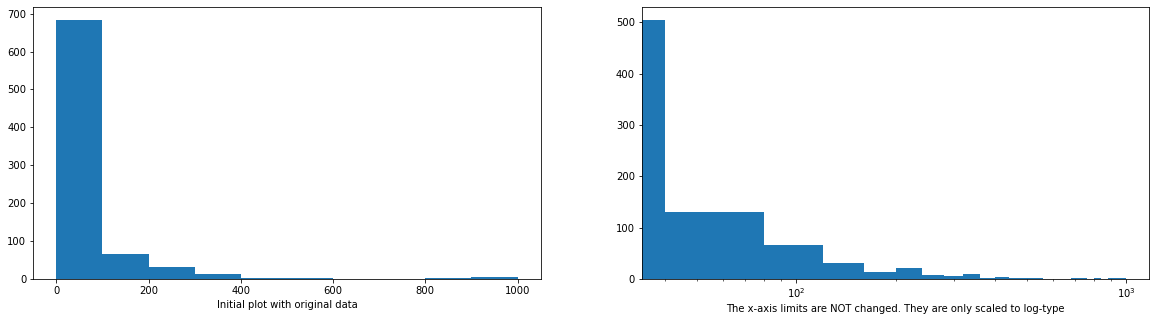

In [56]:
# Necessary import
pokemon = pd.read_csv('pokemon.csv')
pokemon.head(10)

plt.figure(figsize = [20, 5])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
plt.xlabel('Initial plot with original data')

# HISTOGRAM ON RIGHT 
plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['weight'].max()+40, 40)
# print('normal bin edge:', bins)
# print('log of the bin edge above:', np.round(np.log10(bins), 3))
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')
plt.xlabel('The x-axis limits are NOT changed. They are only scaled to log-type');

#### Example 2 - Scale the x-axis to log-type, and change the axis limit.


In [28]:
# Transform the describe() to a scale of log10
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

['0.10', '0.13', '0.16', '0.20', '0.25', '0.32', '0.40', '0.50', '0.63', '0.79', '1.00', '1.26', '1.58', '2.00', '2.51', '3.16', '3.98', '5.01', '6.31', '7.94', '10.00', '12.59', '15.85', '19.95', '25.12', '31.62', '39.81', '50.12', '63.10', '79.43', '100.00', '125.89', '158.49', '199.53', '251.19', '316.23', '398.11', '501.19', '630.96', '794.33', '1000.00']


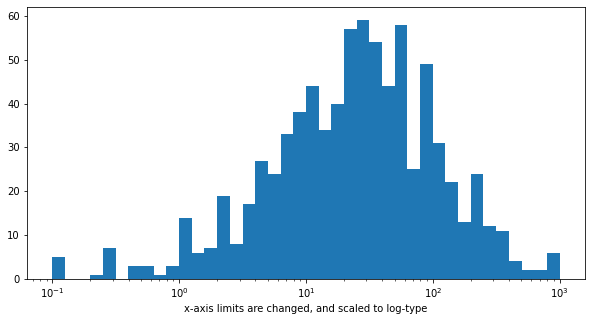

In [52]:
plt.figure(figsize=[10, 5])

# Axis transformation
# Bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
print(['{:0.2f}'.format(b) for b in bins])
plt.hist(data=pokemon, x='weight', bins=bins)

plt.xscale('log')
plt.xlabel('x-axis limits are changed, and scaled to log-type');

### Example 3 - Scale the x-axis to log-type, change the axis limits, and increase the x-ticks


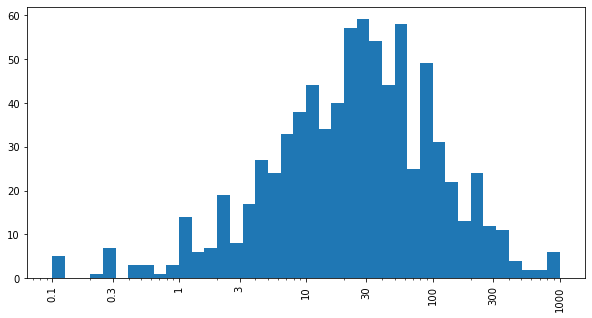

In [57]:
plt.figure(figsize=[10, 5])

bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]


plt.hist(data=pokemon, x='weight', bins=bins);
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels, rotation=90);

For the ticks, we have used `xticks()` to specify locations and labels in their natural units. 

Remember: we aren't changing the values taken by the data, only how they're displayed. Between integer powers of 10, we don't have clean values for even markings, but we can still get close. Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.

Be aware that a logarithmic transformation is not the only one possible. When we perform a logarithmic transformation, our data values have to all be positive; it's impossible to take a log of zero or a negative number. In addition, the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling. 



#### Example 4. Custom scaling the given data Series, instead of using the built-in log scale

If you want to use a different transformation that's not available in xscale, then you'll have to perform some feature engineering. 

In cases like this, we want to be systematic by writing a function that applies both the transformation and its inverse. The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. 

For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.) 


Note that data is a pandas Series, so we can use the apply method for the function. If it were a NumPy Array, we would need to apply the function like in the other cases. The tick locations could have also been specified with the natural values, where we apply the standard transformation function on the first argument of xticks instead.

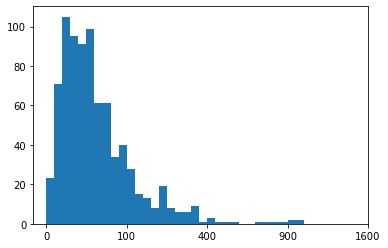

In [35]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(x=pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));